# Chapter 9. 참고할 만한 내용들

## 1. 데이터베이스 연결 및 SQL 사용법

### 1-1. 데이터베이스 연결 방법

In [1]:
# postgresql db 연동용 패키지 설치
!pip install psycopg2

In [2]:
# 패키지 불러오기
import psycopg2

In [3]:
# db 연동 객체 만들기
conn = psycopg2.connect(host='localhost', port = 5432, dbname='postgres', user='postgres', password='1234')

In [4]:
# 연결된 db에 sql 처리를 위한 cursor() 메서드 호출
cur = conn.cursor()

### 1-2. 데이터베이스 테이블의 데이터 조회(Select)

In [5]:
# DB iris 테이블에 전체 데이터 조회하기(select)
qry_s = "select * from datawithpy.iris"

In [6]:
# 쿼리 실행
cur.execute(qry_s)

In [7]:
# 쿼리 실행 결과 데이터 전체 조회해서 row에 저장
row = cur.fetchall()

In [8]:
row[0:5]

[(5.1, 3.5, 1.4, 0.2, 'setosa    '),
 (4.9, 3.0, 1.4, 0.2, 'setosa    '),
 (4.7, 3.2, 1.3, 0.2, 'setosa    '),
 (4.6, 3.1, 1.5, 0.2, 'setosa    '),
 (5.0, 3.6, 1.4, 0.2, 'setosa    ')]

In [9]:
# row 데이터 행수 확인
len(row)

150

In [10]:
import pandas as pd
# row 데이터셋을 데이터프레임으로 변환
db_iris = pd.DataFrame(data = row, columns = ('sl', 'sw', 'pl', 'pw', 'species'))

In [11]:
# db에서 조회해 저장한 결과 확인
db_iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1-3. 데이터베이스 테이블의 데이터 입력(Insert)

In [12]:
# DB iris 테이블에 test 데이터 삽입하기(insert)
qry_i = "insert into datawithpy.iris (sl, sw, pl, pw, species) values (1, 2, 3, 4, 'test')"

In [13]:
# 쿼리 실행
cur.execute(qry_i)

In [14]:
# 쿼리 결과 확정
conn.commit()

### 1-4. 데이터베이스 테이블의 데이터 삭제(Delete)

In [15]:
# DB iris 테이블에 test 데이터 삭제하기(delete)
qry_d = "delete from datawithpy.iris where species = 'test'"

In [16]:
# 쿼리 실행
cur.execute(qry_d)

In [17]:
# 쿼리 결과 확정
conn.commit()

In [18]:
# cursor 및 db 접속 종료
cur.close()
conn.close()

In [19]:
cur.execute(qry_s)

InterfaceError: cursor already closed

---

## 2. 비대칭 데이터

### 2-3. 오버 샘플링

In [20]:
# 비대칭 데이터 처리 패키지 설치
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\programdata\anaconda3\lib\site-packages (0.9.0)


In [21]:
# 라벨이 3개(0, 1, 2)인 비대칭 데이터셋 만들기
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

In [22]:
# y 라벨별 데이터 개수 확인
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


In [23]:
# Random Over Sampling 함수 불러오기
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
# Random Over Sampling 실시
X_resampled, y_resampled = ros.fit_resample(X, y)
# y_resampled 데이터 개수 확인
print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


## 3. 차원축소와 주성분 분석(PCA)

### 3-2. 주성분 분석(PCA)

In [24]:
import numpy as np
import pandas as pd

In [25]:
# iris 데이터셋(데이터프레임) 불러오기
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# species만 제외하고, 별도 데이터셋 구성
iris_n = iris.iloc[:,0:4].values

In [27]:
# standard scaling을 위한 함수 불러오기 및 스케일링
from sklearn.preprocessing import StandardScaler
iris_s = StandardScaler().fit_transform(iris_n)

In [28]:
# 주성분 4개로 학습 실시
from sklearn.decomposition import PCA
pca4 = PCA(n_components=4).fit(iris_s)

In [29]:
# 주성분 4개까지 기여율 표시
pca4.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

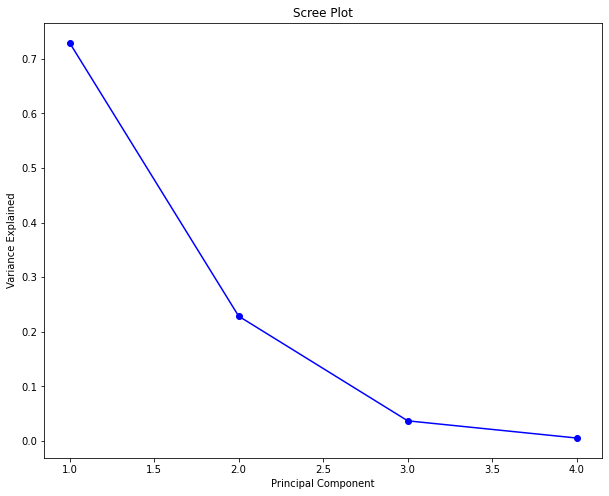

In [30]:
# scree plot 통해 적정 주성분 개수 확인
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
PC_values = np.arange(pca4.n_components_) + 1
plt.plot(PC_values, pca4.explained_variance_ratio_, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [31]:
# 주성분별 선형결합 계수 출력
pca4.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [32]:
# 주성분 2개로 학습 실시
pca2 = PCA(n_components=2).fit(iris_s)

In [33]:
# 스케일된 iris 데이터셋 주성분 2개로 변환
iris_pca = pca2.transform(iris_s)

In [34]:
# 주성분 2개로 신규 iris 데이터프레임 만들기
iris_res = pd.DataFrame(data = iris_pca, columns = ['comp1','comp2'])
iris_res['species'] = iris.species
iris_res.head()

,comp1,comp2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


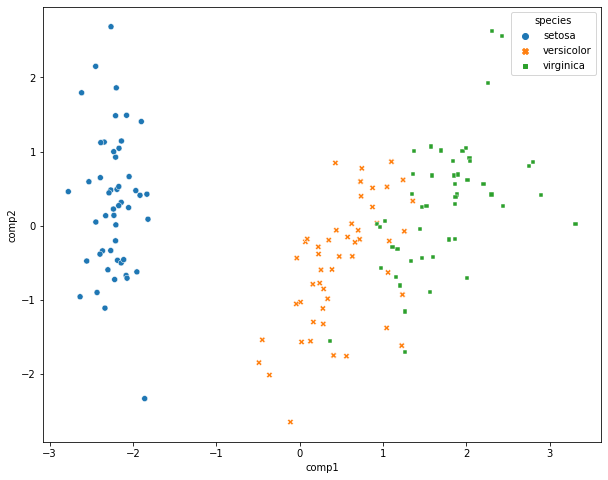

In [35]:
# 주성분 2개로 산점도 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.scatterplot(data = iris_res, x='comp1', y='comp2', hue='species', style = 'species')
plt.show()

---

## 4. 데이터 프레임 집계 및 병합

### 4-1. 데이터 프레임 집계

In [36]:
# iris 데이터셋(데이터프레임) 불러오기
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
# species별 평균
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [38]:
# species별 최댓값
df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [39]:
# species별 통계량 표시(행열변환)
df.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

### 4-2. 데이터 프레임 병합

In [40]:
# 실습용 데이터셋1 만들기
import pandas as pd
df1 = pd.DataFrame({
    'city' : ['서울','부산','대구','대전','광주'],
    'pop' : [978, 343, 247, 153, 150]
})

In [41]:
# 실습용 데이터셋2 만들기
df2 = pd.DataFrame({
    'city' : ['서울','부산','대구','인천'],
    'area' : [605, 770, 884, 1063]
})

In [42]:
df1

,city,pop
0,서울,978
1,부산,343
2,대구,247
3,대전,153
4,광주,150


In [43]:
df2

,city,area
0,서울,605
1,부산,770
2,대구,884
3,인천,1063


<div>
<img src="https://datascience.quantecon.org/_images/merge_venns.png" width="500"/>
    <center>데이터 병합 사례(출처 : https://datascience.quantecon.org/pandas/merge.html)</center>
</div>

#### ① LEFT JOIN

In [44]:
pd.merge(df1, df2, on = 'city', how = 'left')

,city,pop,area
0,서울,978,605.0
1,부산,343,770.0
2,대구,247,884.0
3,대전,153,NaN
4,광주,150,NaN


#### ② RIGHT JOIN

In [45]:
pd.merge(df1, df2, on = 'city', how = 'right')

,city,pop,area
0,서울,978.0,605
1,부산,343.0,770
2,대구,247.0,884
3,인천,NaN,1063


#### ③ INNER JOIN

In [46]:
pd.merge(df1, df2, on = 'city')

,city,pop,area
0,서울,978,605
1,부산,343,770
2,대구,247,884


#### ④ OUTER JOIN

In [47]:
pd.merge(df1, df2, on = 'city', how = 'outer')

,city,pop,area
0,서울,978.0,605.0
1,부산,343.0,770.0
2,대구,247.0,884.0
3,대전,153.0,NaN
4,광주,150.0,NaN
5,인천,NaN,1063.0


## 5. 학습을 위한 대표적인 데이터 셋 소개

### 5-1. 패키지 내장 데이터 셋

#### ① 유방암 진단

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
bc = load_breast_cancer()

In [50]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [51]:
bc.data.shape, bc.target.shape

((569, 30), (569,))

#### ② 보스턴 주택 가격

In [52]:
from sklearn.datasets import load_boston

In [53]:
b = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [54]:
b.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [55]:
b.data.shape, b.target.shape

((506, 13), (506,))

#### ③ MNIST

In [56]:
from tensorflow import keras

In [57]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [58]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))